<a href="https://colab.research.google.com/github/gabrielawad/talleresGoogleColab/blob/main/Taller_14_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «*La bisagra que rechina es la que consigue el aceite*».
### [Malcom X](https://es.wikipedia.org/wiki/Malcolm_X)

# Taller 14 GeoPandas

En este taller aprenderá los conceptos básicos de la librería GeoPandas (librería para el manejo de datos geoespaciales).

Puede consultar más información en: [GeoPandas](https://geopandas.org/en/stable/)

# Referencias

Este taller se basa en información e ideas recopiladas de las siguientes fuentes:
* [Introduction to geospatial data analysis with GeoPandas and the PyData stack](https://github.com/jorisvandenbossche/geopandas-tutorial)
* [Introduction to GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html)
* [User Guide to GeoPandas](https://geopandas.org/en/stable/docs/user_guide.html)
* [GeoPandas Tutorial](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/geopandas.html)
* [GeoPandas: Análisis de datos geográficos en Python](https://mappinggis.com/2021/11/geopandas-analisis-de-datos-geograficos-en-python/)
* [Introducción a Python y Geopandas para el análisis de áreas inundadas - Tutorial](https://gidahatari.com/ih-es/introduccin-a-python-y-geopandas-para-el-anlisis-de-reas-inundadas-tutorial)
* [Caso práctico con Matplotlib y Geopandas](https://www.adictosaltrabajo.com/2021/01/07/caso-practico-con-matplotlib-y-geopandas/)
* [Analyze Geospatial Data in Python: GeoPandas and Shapely](https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/)
* [How to Visualise data in Maps Using GeoPandas](https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/)
* [Mapas con Python utilizando geopandas y matplotlib](http://www.geomapik.com/desarrollo-programacion-gis/mapas-con-python-geopandas-matplotlib/)
* [How to create Google Map in Python using Gmaps](https://morioh.com/p/a9bdee14b0d2)
* [Introduction to GIS Analysis with GeoPandas using Python](https://morioh.com/p/f7df5762aea0?f=5c21fb01c16e2556b555ab32)

# De Pandas a GeoPandas

GeoPandas es una «*extensión*» de Pandas que permite incorporar información geográfica (coordenadas geoespaciales) asociada a los datos de interés. 

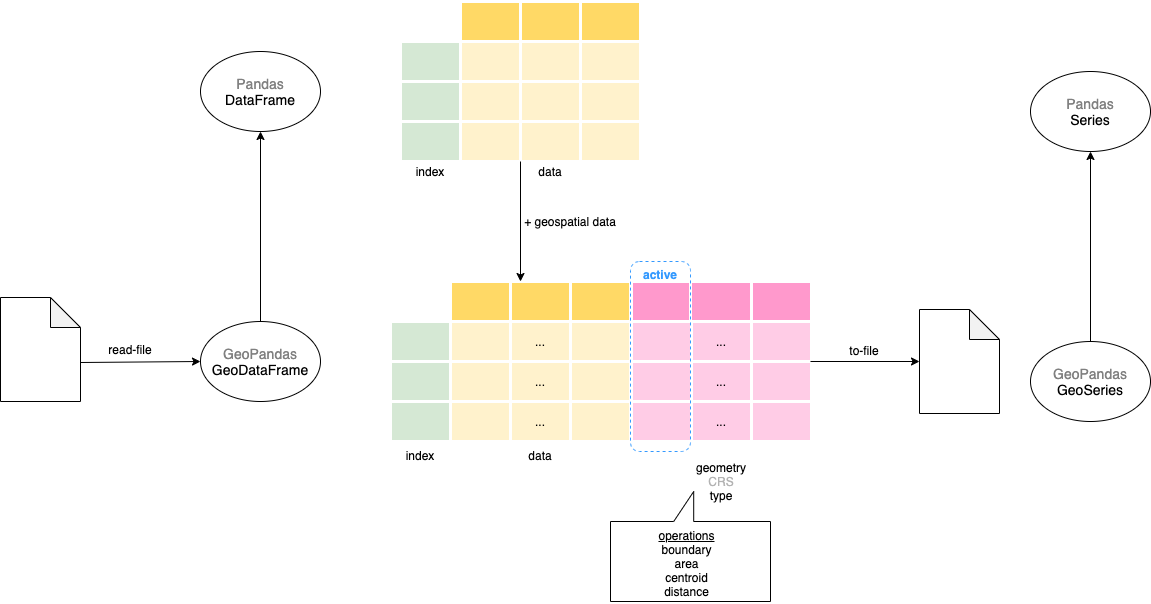

Tomado de: [How to Visualise data in Maps Using GeoPandas](https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/)

## Tipos de datos espaciales

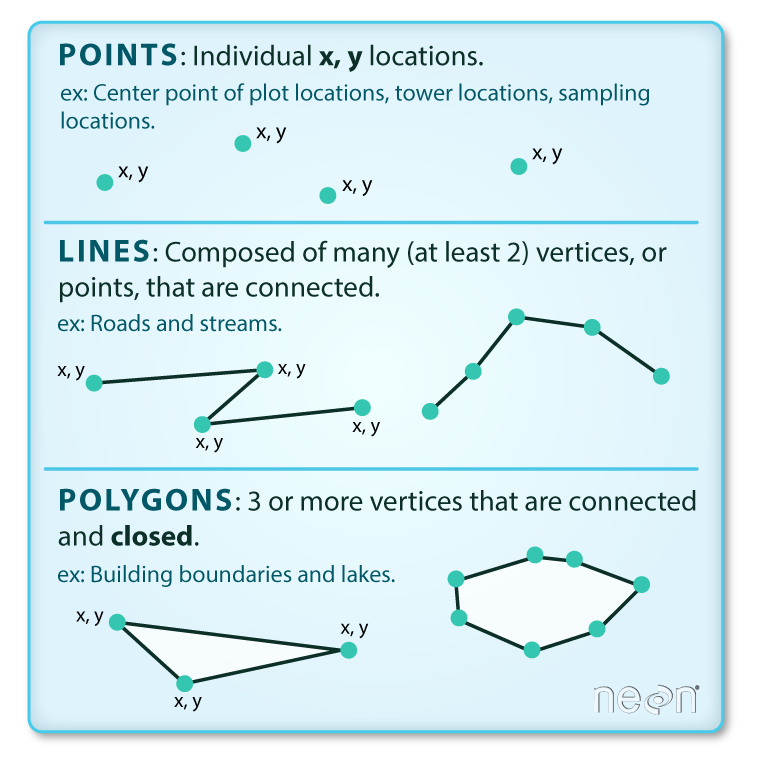

Tomado de: [Lesson 4. GIS in Python](https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/)

## Del  Sistema de Referencia de Coordenadas (CRS/Coordinate Reference System) al sistema cartesiano

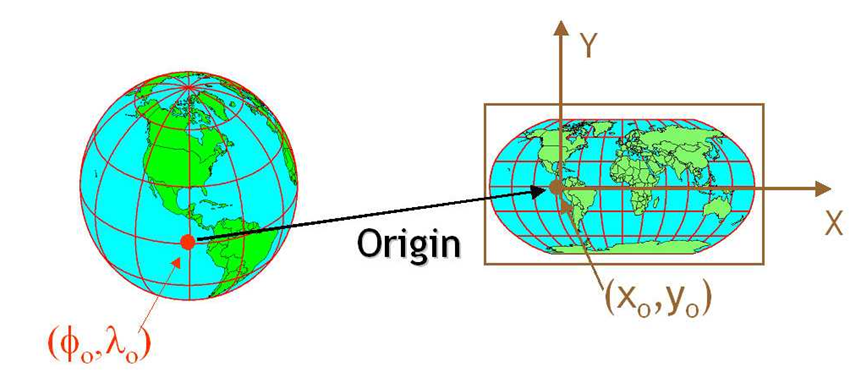

Tomado de: [Lesson 3. Coordinate Reference System and Spatial Projection](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/)

# Instalar GeoPandas

GeoPandas no es una librería nativa de Python por lo que **requiere ser instalada antes de ser invocada**.


In [ ]:
# Instalar GeoPandas
!pip install geopandas

# Lectura de archivos en GeoPandas

GeoPandas lee múltiples formatos de datos espaciales basados en vectores ([ESRI](https://en.wikipedia.org/wiki/Esri), [GeoJSON](https://geojson.org/), [shapefile](https://en.wikipedia.org/wiki/Shapefile)) con el comando:

**geopandas.read_file()**

## Datasets nativos de GeoPandas

In [ ]:
# Importar las librerías requeridas
import geopandas as gpd

# Indicar la ruta del dataset nativo
ruta = gpd.datasets.get_path("nybb")
#ruta = gpd.datasets.get_path("naturalearth_cities")
#ruta = gpd.datasets.get_path("naturalearth_lowres")

# Leer el dataset
geo_dataframe = gpd.read_file(ruta)

# Mostrar el dataset
geo_dataframe

## Datasets desde páginas web

### Lectura con Pandas

In [ ]:
# Importar las librerías requeridas
import pandas as pd

# Cargar resultados csv desde un servidor en DataFrame de Pandas
servidor = 'https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?'
query = 'service=WFS&version=2.0.0&request=GetFeature&typeName=GVP-VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=csv'

# Crear el DataFrame
volcanes_df = pd.read_csv(servidor + query)
print(type(volcanes_df))
volcanes_df.head(5)

### Lectura con GeoPandas

In [ ]:
# Importar las librerías requeridas
import geopandas as gpd

# Lectura desde http://geojson.xyz/
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places.geojson"
#url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
lugares_poblados_df = gpd.read_file(url)
lugares_poblados_df.tail(10)

## Datasets ubicados en el Drive

Ejemplo con datos tomados de: [Colombia GeoJSON municipios](https://www.kaggle.com/datasets/alfredomaussa/colombia-geojson-municipios)

### Habilitar el acceso a los archivos del Drive

In [ ]:
# Habilitar el acceso a los archivos del Drive
import google.colab as gc
gc.drive.mount('/content/drive')

### Leer el archivo desde el Drive

In [ ]:
# Importar las librerías requeridas
import geopandas as gpd

# Establecer la ubicación del archivo en el Drive
ruta = "/content/drive/MyDrive/Colab Notebooks/Programación/Archivos_datos/municipios_GeoJSON.geojson"

# Cargar el archivo
mpios_col_df = gpd.read_file(ruta)

# Verificar la lectura del archivo
mpios_col_df.head(3)

# Guardar archivos en GeoPandas


### Guardar en GeoJson

In [ ]:
# Guardar los datos en un archivo GeoJson
mpios_col_df.to_file("municipios_colombia.geojson", driver="GeoJSON")

# Indexado y selección de datos en GeoPandas

Se pueden utilizar los métodos **loc** e **iloc** de Pandas o el método **cx** de GeoPandas.

In [ ]:
# Importar las librerías requeridas
import geopandas as gpd

# Indicar la ruta del dataset nativo
ruta = gpd.datasets.get_path("naturalearth_lowres")

# Leer el dataset
geo_dataframe = gpd.read_file(ruta)

# Crear un GeoDataFrame con los países del sur utilizando el método cx
paises_sur = geo_dataframe.cx[:, :0]

# Mostrar el dataset
paises_sur.plot(figsize=(10, 5))

# Herramientas gráficas

Las herramientas gráficas de GeoPandas están basadas en [matplotlib](https://matplotlib.org/).

In [ ]:
# Importar las librerías requeridas
import geopandas as gpd

# Indicar las rutas de los datasets nativos
ruta_0 = gpd.datasets.get_path("naturalearth_lowres")
ruta_1 = gpd.datasets.get_path("naturalearth_cities")


# Leer los datasets nativos
mundo_dataframe = gpd.read_file(ruta_0)
ciudades_dataframe = gpd.read_file(ruta_1)

# Verificar la lectura de los datasets nativos
print(mundo_dataframe.head(3))
print(ciudades_dataframe.head(3))

# Mostrar las fronteras de los países
mundo_dataframe.boundary.plot()

# Mostrar el gráfico de dispersión de las ciudades
ciudades_dataframe.plot()

### Mapas con colores y con leyendas

In [ ]:
# Importar las librerías requeridas
import matplotlib.pyplot as plt
import geopandas as gpd

# Indicar la ruta del dataset nativo
ruta_0 = gpd.datasets.get_path("naturalearth_lowres")

# Leer el dataset nativo
mundo_dataframe = gpd.read_file(ruta_0)

# Verificar la lectura del dataset nativo
print(mundo_dataframe.head(3))

# Seleccionar los países con población mayor a cero y excluir la Antártica
mundo_dataframe = mundo_dataframe[(mundo_dataframe.pop_est>0) & (mundo_dataframe.name!="Antarctica")]

# Calcular el PIB per capita
mundo_dataframe['gdp_per_cap'] = mundo_dataframe.gdp_md_est / mundo_dataframe.pop_est

# Configurar figura
fig, ax = plt.subplots(1, 1)

# Mostrar PIB per capita
mundo_dataframe.plot(column='gdp_per_cap', ax=ax, legend=True, 
                     legend_kwds={'label': "PIB per capita",
                        'orientation': "horizontal"})

### Superponer mapas

In [ ]:
# Importar las librerías requeridas
import geopandas as gpd

# Indicar las rutas de los datasets nativos
ruta_0 = gpd.datasets.get_path("naturalearth_lowres")
ruta_1 = gpd.datasets.get_path("naturalearth_cities")


# Leer los datasets nativos
mundo_dataframe = gpd.read_file(ruta_0)
ciudades_dataframe = gpd.read_file(ruta_1)

# Verificar la lectura de los datasets nativos
print(mundo_dataframe.head(3))
print(ciudades_dataframe.head(3))

# Establecer el mapa de referencia
base = mundo_dataframe.plot(color='white', edgecolor='black')

# Superponer las ciudades al mapa de referencia
ciudades_dataframe.plot(ax=base, marker='o', color='red', markersize=5)

## Geocodificación


In [ ]:
# Importar las librerías requeridas
import matplotlib.pyplot as plt
import geopandas as gpd

# Indicar la ruta del dataset nativo
ruta = gpd.datasets.get_path("nybb")

# Leer el dataset
distritos_ny = gpd.read_file(ruta)

print(distritos_ny.head(), "\n")

# Mostrar el nombre de los distritos
print("Los distritos de New York son:\n", distritos_ny.BoroName, "\n")

# Obtener las coordenadas de los distritos de New York
coord_distritos_ny = gpd.tools.geocode(distritos_ny.BoroName)

# Mostrar las coordenadas de los distritos
print("Las coordenadas de los distritos de New York son:\n", coord_distritos_ny, "\n")

# Crear la gráfica
fig, ax = plt.subplots()

distritos_ny.to_crs("EPSG:4326").plot(ax=ax, color="white", edgecolor="black");

coord_distritos_ny.plot(ax=ax, color="red")

# Ejemplos

## Resultados de los Juegos Olímpicos 2021

Datos tomados de: [2021 Olympics in Tokyo](https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo)

Ejemplo tomado de: [How to Visualise data in Maps Using GeoPandas](https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/)

### Habilitar el acceso a los archivos del Drive

In [ ]:
# Habilitar el acceso a los archivos del Drive
import google.colab as gc
gc.drive.mount('/content/drive')

### Cargar librerías requeridas

In [ ]:
# Importar las librerías requeridas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

### Cargar mapa de referencia

In [ ]:
# Indicar la rutas del dataset nativo
ruta_0 = gpd.datasets.get_path("naturalearth_lowres")

# Cargar el dataset con la información de los países
df_world = gpd.read_file(ruta_0)

# Verificar la lectura del dataset
print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

### Obtener información del archivo


In [ ]:
# Cargar los datos
ruta_equipos = '/content/drive/MyDrive/Colab Notebooks/Programación/Archivos_datos/Teams_2021.xlsx'

equipos_df = pd.read_excel(ruta_equipos)
print (equipos_df)

### Unir los dos DataFrames

In [ ]:
# Unir los dos DataFrames
df_world_teams = df_world.merge(equipos_df, how="left", left_on=['name'], right_on=['NOC'])

# Verificar la unión de los dos DataFrames
print("Type of DataFrame : ", type(df_world_teams), df_world_teams.shape[0])
df_world_teams.head()

### Mapa de número de disciplinas por países

In [ ]:
# Crear la gráfica
fig, ax = plt.subplots()
ax.set_title("Paises Vs. número de disciplinas en las que participó en los Olímpicos del 2021")
df_world_teams.plot( column="Discipline", ax=ax, cmap='OrRd')

# Ejercicios

### 00 a 11

Revise los primeros doce ejemplos que aparecen en [Examples Gallery](https://geopandas.org/en/stable/gallery/index.html) de Geopandas y replique el código utilizando mapas de [geojson.xyz](http://geojson.xyz/)